In [1]:
import IGIMF4
import numpy as np
import pandas as pd
plots = IGIMF4.Plots()

In [2]:
# Parameters evaluated at time t

#metal_mass_fraction = 1e-1 * 0.0142
M_igal = 1e10

In [3]:
downsizing_obj = IGIMF4.Downsizing(M_igal)
print(f'{downsizing_obj.M_igal = :.2e} [Msun]')
print(f'{downsizing_obj.downsizing_time = } [Gyr]')
print(f'{downsizing_obj.SFR = } [Msun/yr]')

downsizing_obj.M_igal = 1.00e+10 [Msun]
downsizing_obj.downsizing_time = 0.9689945113416355 [Gyr]
downsizing_obj.SFR = 10.319975895585161 [Msun/yr]


In [4]:
# Grids

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=50)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=20)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=20)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

metallicity_v = np.log10(Z_massfrac_v/0.0142)
print(f'{metallicity_v=}')

mstar_v=array([7.00000000e-02, 8.18610844e-02, 9.57319592e-02, 1.11953171e-01,
       1.30922972e-01, 1.53107092e-01, 1.79050179e-01, 2.09389169e-01,
       2.44868921e-01, 2.86360506e-01, 3.34882594e-01, 3.91626461e-01,
       4.57985240e-01, 5.35588120e-01, 6.26340347e-01, 7.32470000e-01,
       8.56582693e-01, 1.00172554e+00, 1.17146199e+00, 1.36995927e+00,
       1.60209074e+00, 1.87355550e+00, 2.19101836e+00, 2.56227341e+00,
       2.99643542e+00, 3.50416362e+00, 4.09792334e+00, 4.79229212e+00,
       5.60431757e+00, 6.55393591e+00, 7.66446144e+00, 8.96315893e+00,
       1.04819130e+01, 1.22580109e+01, 1.43350581e+01, 1.67640486e+01,
       1.96046171e+01, 2.29265031e+01, 2.68112629e+01, 3.13542722e+01,
       3.66670675e+01, 4.28800844e+01, 5.01458601e+01, 5.86427784e+01,
       6.85794491e+01, 8.01998295e+01, 9.37892145e+01, 1.09681240e+02,
       1.28266075e+02, 1.50000000e+02])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([49]),)

Mecl_v=array([5.00000000e

In [5]:
def k_mmax_find(m_star_max=150):
    IMF_v_Z_list = []
    alpha1_Z_list = []
    alpha3_Z_list = []
    m_max_Z_list = []
    k_IMF_Z_list = []
    for Z in Z_massfrac_v:
        IMF_v_list = []
        alpha1_list = []
        alpha3_list = []
        m_max_list = []
        k_IMF_list = []
        for M in Mecl_v:
            igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR, m_star_max=m_star_max)
            sIMF = igimf4.stellar_IMF(M)
            #print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t k_IMF=%.2e,\t m_max=%.2f,\t [Z]=%.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[0], sIMF[1], igimf4.metallicity))
            IMF_v = sIMF[2](mstar_v)
            alpha1_list.append(sIMF[4])
            alpha3_list.append(sIMF[6])
            m_max_list.append(sIMF[1])
            k_IMF_list.append(sIMF[0])
            IMF_v_list.append(IMF_v)
            #igimf4.ECMF_plot(Mecl_v, ECMF_v)
        IMF_v_Z_list.append(IMF_v_list)
        alpha1_Z_list.append(alpha1_list)
        alpha3_Z_list.append(alpha3_list)
        m_max_Z_list.append(m_max_list)
        k_IMF_Z_list.append(k_IMF_list)
    plots.k_Z_plot(Z_massfrac_v, k_IMF_Z_list, m_max_Z_list, Mecl_, m_star_max=m_star_max)

<Figure size 432x288 with 0 Axes>

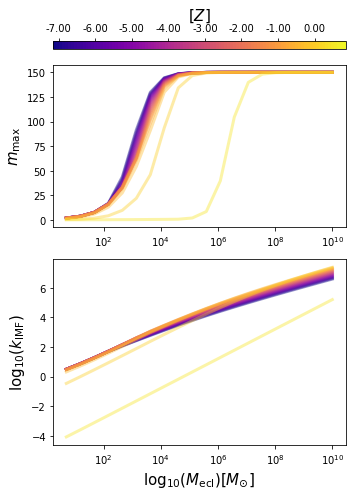

In [6]:
k_mmax_find()

<Figure size 432x288 with 0 Axes>

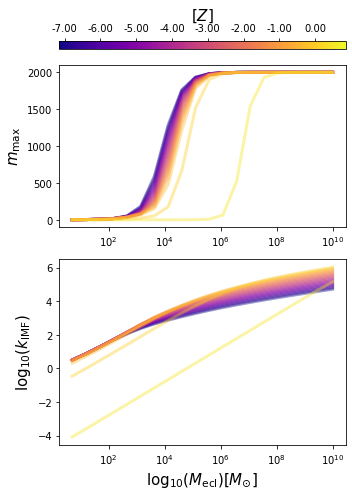

In [7]:
k_mmax_find(m_star_max=2e3)